# TP n°3 (TP noté) : Moindres carrés

### IMPORTATION DES LIBRAIRIES

In [14]:
import numpy as np
import random as rdm
import pandas as pd
from download import download
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

### EXERCICE 1 - Préliminaires

1) **(0.25pt)** Construire la chaîne de caractères `nom_fichier` données ci-dessus, et donner sa taille.

In [15]:
## Question 1.
nom_fichier = "tp_note3_hlma408_gr_nbgr_bastien_thouroude.ipynb"

2) **(0.25pt)** Calculer $\alpha$ qui vaut la longueur de la chaîne de caractère `mon_fichier` divisé par 1000 (par exemple pour `nom_prenom` = `Salmon_Joseph`, on trouve $\alpha = 0.041$, soit 4.1 %) et donner le
quantile $(1 - \alpha)$ d’une loi gaussienne centrée réduite.


In [29]:
## Question 2.
alpha = len(nom_fichier) / 1000

print("α = " + str(alpha) + ", soit " + str(alpha * 100) + " %")

##Calcul du quantile(1 - alpha) (a écrire)
quantile = 0

print("Le quantile (1 - α) d'une loi gausienne centrée réduite est : " + str(quantile))

α = 0.048, soit 4.8 %
Le quantile (1 - α) d'une loi gausienne centrée réduite est : 0


### EXERCICE 2 - Dés et tirages aléatoires

On se propose de simuler numériquement le fonctionnement d’un dé à 4 fâces (numérotées de 1 à 4), et de vérifier statistiquement que la simulation est satisfaisante.

1) **(0.75pt)** Créer une fonction appelée `echantillon_de4` en Python qui prend en entrée `n_samples`, et qui renvoit en sortie un vecteur (`numpy array`) de taille `n_samples`, dont les valeurs sont tirées au hasard et uniformément entre 1 et 4.

In [17]:
## Question 1.
def echantillon_de4 (n_samples) :

    ##Je définis un vecteur de taille n_samples remplit de 0
    tirage = np.zeros(n_samples)

    ##Pour chaque élément de mon vecteur, je tire une valeur aléatoire et uniforme sur [1; 4]
    for i in range(n_samples) :
        tirage[i] = rdm.uniform(1,4)
    
    return tirage

2) **(0.25pt)** Tirer un échantillon de taille `n_samples` $= 1000$ avec cette fontion, et donner les fréquences empiriques des 4 faces.

In [18]:
## Question 2.
tirage1000 = echantillon_de4(1000)
for i in range(1000) : 
    ##Calculer les fréquences empiriques
    pass

3) **(1 pts)**  Proposer une méthodologie pour valider par un test statistique si votre fonction est bien valide, et conclure sur la qualité de votre méthode

In [19]:
## Question 3.

### EXERCICE 3 - Prairies et rendement agricole

Dans cet exercice, on veut faire une analyse de la variance pour vérifier l’influence du type de sol sur
le rendement fourrager. On dispose de 30 observations de parcelles de prairie pour lesquelles on a mesuré
la variable `rendement` (en tonnes) et on donne la variable `parcelle` qui indique le type de sol (codé par
1, 2 ou 3).

1) Importez le jeu de données `prairie.txt` dans une table nommée `prairie`

In [20]:
## Question 1.
##Je rentre mon url dans une variable pour pouvoir aisément en changer
url = "http://josephsalmon.eu/enseignement/datasets/prairie.txt"

#Je récupère le fichier dans un table (en fixant le délimiteur de colonne par un espace ' ')
prairie = np.genfromtxt(url, delimiter=' ', skip_header=1)
prairie = pd.DataFrame(prairie)

2) **(1pt)** Reproduire avec Python le graphique de la Figure 1.

Tracer avec `subplots` un graphique qui contient deux sous-graphiques du rendement des parcelles en fonction du type de sol (encodé par `parcelle`) : en haut, un diagramme en violon ; en bas, un graphique `swarmplot` des données.

In [21]:
## Question 2.

### EXERCICE 4 - Impact d'un traitement sur la croissance des plantes

Une expérience de comparaison de deux traitements de plantes repose sur l’étude d’un échantillon de 20 plantes : 10 plantes ont été sélectionnées au hasard pour subir le traitement 1 et les 10 plantes restantes ont subi le traitement 2. On va étudier la masse (en grammes) des plantes après traitement.

1) Créez deux vecteurs `echA` et `echB` qui contiennent respectivement les données des poids avec le traitement A et le traitement B :
$$14.4, 14.7, 13.2, 12.1, 18.7, 15.0, 13.3, 17.8, 16.6, 15.0 \space \space (traitement A)$$
$$25.6, 17.7, 19.0, 26.7, 22.6, 19.1, 22.9, 21.0, 25.7, 23.7 \space \space (traitement B)$$


In [22]:
## Question 1.
echA = np.array([14.4, 14.7, 13.2, 12.1, 18.7, 15.0, 13.3, 17.8, 16.6, 15.0])
echB = np.array([25.6, 17.7, 19.0, 26.7, 22.6, 19.1, 22.9, 21.0, 25.7, 23.7])

2) **(1pt)** Donner un intervalle de confiance bilatéral, au niveau de confiance de $1 - \alpha$, de la différence
des moyennes pour les deux traitements. Comparer les résultats obtenus avec et sans l’hypothèse
de variances égales.


In [23]:
## Question 2.

3) **(1pt)** Tester l’égalité des moyennes des deux groupes de plantes qui reçoivent le traitement A et B,
Optez pour un test bilatéral et comparez les résultats obtenus avec et sans l’hypothèse de variances
égales. Donnez $H_0$, $H_1$ et la $p$-valeur de ces tests. Conclure.

In [24]:
## Question 3.

### EXERCICE 5 - Hospitalisation : Répartition des entrées

Dans cet exercice on souhaite savoir si les entrées à l’hôpital pour une certaine maladie (la maladie **A**) sont réparties au hasard dans l’année ou bien si certains mois sont plus propices à la maladie **A**. On examine le mois d’entrée d’un échantillon de 120 porteurs de la maladie A. Les résultats sont contenus dans le fichier `Hospit.csv`. 
Écrire un code qui vous permettra de répondre à la question suivante : Peut-on affirmer avec un risque $\alpha$ (le même $\alpha$ qu’à l’EXERCICE 1) que "les entrées pour la maladie **A** ne se font pas au hasard dans l’année" ? Vous inclurez des commentaires dans votre code et vous indiquerez clairement $H_0$, $H_1$, le test utilisé et la $p$-value de ce test ainsi que la conclusion que vous pouvez en tirer.


In [25]:
url = "http://josephsalmon.eu/enseignement/datasets/Hospit.csv"

hospit = pd.read_csv(url, sep = ';', index_col = 0)

print(hospit)

##Bastien fait la suite

    Mois_hospit Maladie
ID                     
1       Janvier       A
2       Janvier       A
3       Juillet       B
4      Novembre       A
5          Mars       A
..          ...     ...
147     Janvier       A
148     Juillet       A
149       Avril       A
150     Fevrier       A
151        Aout       A

[151 rows x 2 columns]


### EXERCICE 6 - Arbres : taille et volume (6.5 pts)

Un étudiant en techniques forestières veut utiliser la régression linéaire pour estimer le volume en bois utilisable d’un arbre debout en fonction de l’aire du tronc mesurée à 25 cm du sol. Il a choisi au hasard 10 arbres et a mesuré, à la base, l’aire correspondante (en cm2). Il a par la suite enregistré, une fois l’arbre coupé, le volume correspondant en $m^3$.

Le fichier arbres.txt contient les données. Les variables sont vol et aire qui représentent respectivement le volume utilisable et l’aire à la base du tronc.

Le but de cet exercice est d’étudier la variable vol en fonction de la variable aire.


1) **(0.25 pts)** Importez automatiquement le jeu de donnée `arbres.txt` dans un dataframe que vous nommerez `df_arbres`

In [26]:
## Question 1.
url = "http://josephsalmon.eu/enseignement/datasets/arbres.txt"

df_arbres = np.genfromtxt(url, delimiter=' ', names=True)

df_arbres = pd.DataFrame(df_arbres)

2) **(1pt)** Ajustez le modèle linéaire qui explique la variable `vol` (en ordonnée) par la variable `aire` (en abscisse). Donner la valeur de la pente estimée ainsi que celle de l’ordonnée à l’origine. 

In [27]:
## Question 2.
# Je génère mon modèle de regression linéaire avec statsmodels
results = smf.ols("vol ~ aire", data=df_arbres).fit()

coefs_regression_lineaire = results.params
print("Le coefficient directeur estimé de ma regression linéaire est R = " + str(coefs_regression_lineaire['aire']) + ", et l'ordonnée à l'origine estimée est b = " + str(coefs_regression_lineaire['Intercept']))

Le coefficient directeur estimé de ma regression linéaire est R = 0.000490810166914014, et l'ordonnée à l'origine estimée est b = 0.00523255831858431


3) **(1pt)** Représentez le nuage des points du volume (en ordonnée) en fonction de l’aire (en abscisse) ainsi que la droite d’ajustement des moindres carrés. On prendra soin aux légendes, au titre, aux noms des axes, etc.

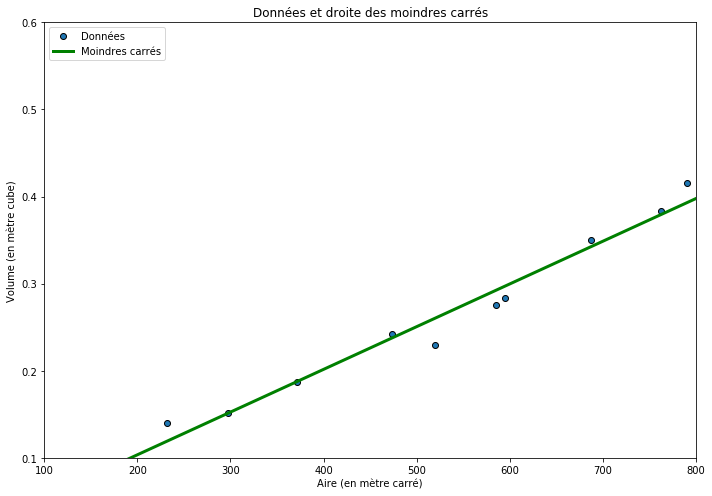

In [28]:
## Question 3.
# Je définis quelques variables pour simplifier l'affichage des graphiques
ymin_normal = 0.1
ymax_normal = 0.6
xmin_normal = 100
xmax_normal = 800

ylabels = "Volume (en mètre cube)"
xlabels = "Aire (en mètre carré)"

# Je créer l'axe des abscisses pour lequel on va évaluer le modèle
X_to_predict = np.linspace(xmin_normal, xmax_normal, num=50).reshape(50, 1)
X_to_predict = pd.DataFrame(X_to_predict, columns=['aire'])


# J'affiche les données et la regression linéaire associée
fig = plt.figure(figsize=(10, 7))
plt.xlabel(xlabels)
plt.ylabel(ylabels)
plt.plot(df_arbres['aire'], df_arbres['vol'], 'o', label=r'Données', markeredgecolor='k', markeredgewidth=1)

plt.xlim(left=xmin_normal, right=xmax_normal)
plt.ylim(bottom=ymin_normal, top=ymax_normal)

plt.plot(X_to_predict, results.predict(X_to_predict), linewidth=3, color='green', label=r"Moindres carrés")
plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
plt.title("Données et droite des moindres carrés")
plt.tight_layout()
plt.show()

4) **(0.5pt)** Donnez la proportion de la variance expliquée par le modèle linéaire.

In [ ]:
## Question 4.
variance = results

print("La proportion de la variance avec notre modèle est : Var = " + str(variance))

5) **(0.75pt)** Afficher une courbe représentant un estimateur à noyau des résidus studentisés.


In [ ]:
## Question 5.

6) **(1pt)** Proposez un intervalle de *prédiction* pour le volume correspondant à une aire de 465$cm^2$ pour un niveau de confiance de 1 − $\alpha$ (avec $\alpha$ la valeur obtenu à l’EXERCICE 1).

In [ ]:
## Question 6.

7) **(2pt)** Afficher sur un graphique les données brutes, la droite de régression obtenue par les moindres carrés, la prédiction donnée par le modèle pour la valeur 465$cm^2$. Enfin, proposer une représentation
graphique de l’intervalle de confiance pour le niveau de confiance $\alpha$ calculé à la question précédente.

In [ ]:
## Question 7.

### EXERCICE 7 - Pollution en Occitanie (2pts Bonus)

Reprendre la base de données sur les principaux polluants en Occitanie.
Proposer une comparaison approfondie du niveau de pollution entre Toulouse et Montpellier sur le niveau de NO2. On pourra s’intéresser au niveau de pollution pour certaines saisons seulement, pour certains jours de la semaine/week-end, pour la journée / pour la nuit, etc. Ces comparaisons seront appuyées d’un argumentaire graphique et statistique (test/intervalle de confiance) de votre choix.
